# C.7.12 텐서플로 케라스 신경망 모델

# 이 절은 구글 코랩에서 실행해야 함에 유의

# 2014DC2_dummy_indicator_friendly.csv 파일을 구글 드라이브에 업로딩하고 이를 구글 코랩에서 불러오기 위해서는 책 본문의 안내 사항 준수 필요

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Data/2014DC2_dummy_indicator_friendly.csv')
df.head(3)

,Asset2,Asset7,Asset9,B2B_purchase1,Capital1,CapitalRatio1,Cost1,Cost11,Cost12,Cost13,Cost14,Cost16,Cost17,Cost2,Cost9,Design1,Emp_total,EquityShareCapital,ITAssetC,Liability2,Liability3,NProfitB4Tax,OutsourcingCost,Patent1,RNDcost1,RevProfit2,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TAssetC8,TradeMark1,emp6,emp66,EBizSystem2,EBizSystem3,EBizSystem4,EBizSystem5,...,IndCategory2_61,IndCategory2_62,IndCategory2_63,IndCategory2_64,IndCategory2_65,IndCategory2_66,IndCategory2_68,IndCategory2_69,IndCategory2_70,IndCategory2_71,IndCategory2_72,IndCategory2_73,IndCategory2_74,IndCategory2_75,IndCategory2_85,IndCategory2_86,IndCategory2_87,IndCategory2_90,IndCategory2_91,IndCategory2_95,StockMktListing_1,StockMktListing_2,StockMktListing_4,IndCategory1_encoded_1.0,IndCategory1_encoded_2.0,IndCategory1_encoded_3.0,IndCategory1_encoded_4.0,IndCategory1_encoded_5.0,IndCategory1_encoded_6.0,IndCategory1_encoded_7.0,IndCategory1_encoded_8.0,IndCategory1_encoded_9.0,IndCategory1_encoded_10.0,IndCategory1_encoded_11.0,IndCategory1_encoded_12.0,IndCategory1_encoded_13.0,IndCategory1_encoded_14.0,IndCategory1_encoded_15.0,IndCategory1_encoded_16.0,IndCategory1_encoded_17.0
0,9.945205,9.474088,6.298949,10.365774,10.410305,0.0,11.588830,6.167516,2.639057,3.218876,10.583625,7.522400,3.295837,9.057422,5.351858,NaN,5.476464,9.918327,0.0,10.126831,10.585801,0.000000,NaN,NaN,NaN,8.977273,6.146329,0.000000,0.000000,0.0,0.000000,4.595120,5.877736,NaN,3.688879,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11.776105,12.201834,9.355133,11.795771,12.966430,0.0,12.199682,7.108244,2.484907,0.000000,11.231358,7.021084,7.058758,10.823890,7.142827,0.000000,6.318968,8.987322,0.0,10.964952,9.896866,10.177096,5.105945,0.000000,NaN,10.164081,4.875197,0.000000,0.000000,0.0,0.000000,0.000000,4.488636,1.791759,5.068904,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.295325,9.871119,3.218876,10.485033,9.842144,0.0,11.471541,6.184149,1.098612,0.000000,10.752313,7.288244,3.526361,8.491260,0.000000,0.693147,4.919981,7.937732,0.0,10.959662,7.610358,7.932003,0.000000,1.098612,NaN,8.201386,5.726848,4.770685,0.693147,0.0,5.056246,2.890372,0.000000,3.258097,3.951244,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(12417, 193)

In [ ]:
df.isnull().sum()

Asset2                          0
Asset7                       1528
Asset9                       3521
B2B_purchase1                3247
Capital1                        0
                             ... 
IndCategory1_encoded_13.0       0
IndCategory1_encoded_14.0       0
IndCategory1_encoded_15.0       0
IndCategory1_encoded_16.0       0
IndCategory1_encoded_17.0       0
Length: 193, dtype: int64

In [ ]:
df.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

Asset7             True
Asset9             True
B2B_purchase1      True
Cost12             True
Cost13             True
Cost16             True
Cost17             True
Design1            True
ITAssetC           True
Liability3         True
OutsourcingCost    True
Patent1            True
RNDcost1           True
TAssetC1           True
TAssetC2           True
TAssetC3           True
TAssetC4           True
TAssetC5           True
TAssetC6           True
TAssetC8           True
TradeMark1         True
emp66              True
dtype: bool

In [ ]:
# Imputation indicator가 생성됨에 주의

data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['EBizSystem2']                # 타겟변수만 target에 저장

# 50:50 data partition
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

# interval 변수의 null value를 평균(mean)으로 impute 및 add_indicator 포함 
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean', add_indicator=True)  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

print("X_train2 shape:", X_train2.shape) 
print("X_test2 shape:", X_test2.shape) 

X_train2 shape: (6208, 214)
X_test2 shape: (6209, 214)


In [ ]:
type(X_train2)

numpy.ndarray

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
# 참조 코딩
print(X_train2) 

[[8.24170316 6.77992191 5.48506567 ... 0.         0.         0.        ]
 [7.79028238 2.94443898 4.58496748 ... 0.         0.         0.        ]
 [8.79346036 5.63835467 4.39444915 ... 0.         0.         1.        ]
 ...
 [8.6881167  7.00578902 5.25749537 ... 0.         0.         0.        ]
 [9.49280888 6.48463524 6.99850964 ... 0.         0.         0.        ]
 [8.45977592 7.34601021 5.48506567 ... 0.         0.         0.        ]]


In [ ]:
# 참조 코딩
X_train2.shape

(6208, 214)

In [ ]:
# 참조 코딩
print(y_train_np)

[0 1 0 ... 1 1 1]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# 은닉 층 활성화 함수 relu, 옵티마이저 adam, input_shape 지정시
# 매번 결과가 미묘하게 다른 것은 초기에 가중치 조건 등이 달라지는 것에 기인
model = tf.keras.Sequential([
  layers.Dense(100, activation='relu', input_shape=(214,)),
  layers.Dropout(.5),
  layers.Dense(100, activation='relu'),
  layers.Dropout(.5),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               21500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 31,701
Trainable params: 31,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 활성화 함수 relu, 옵티마이저 adam
model = tf.keras.Sequential([
  layers.Dense(100, activation='relu'),
  layers.Dropout(.5),
  layers.Dense(100, activation='relu'),
  layers.Dropout(.5),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# tf.keras는 옵티마이저로 adam과 sgd을 제공
# tf.keras의 활성화 함수 중 relu와 tanh를 고려. tf.keras는 활성화 함수로 logistic을 두지 않음에 유의

# 2개의 옵티마이저, 2개의 활성화 함수의 각 조합을 각기 5회씩 실행

In [ ]:
### 활성화 함수 및 옵티마이저 조합 성능 비교

In [ ]:
import random as python_random

np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

In [ ]:
# 비교안 1) 활성화 함수 relu, 옵티마이저 sgd
model = tf.keras.Sequential([
  layers.Dense(100, activation='relu'),
  layers.Dropout(.5),
  layers.Dense(100, activation='relu'),
  layers.Dropout(.5),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# 비교안 2) 활성화 함수 tanh, 옵티마이저 sgd
model = tf.keras.Sequential([
  layers.Dense(100, activation='tanh'),
  layers.Dropout(.5),
  layers.Dense(100, activation='tanh'),
  layers.Dropout(.5),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# 비교안 3) 활성화 함수 relu, 옵티마이저 adam
model = tf.keras.Sequential([
  layers.Dense(100, activation='relu'),
  layers.Dropout(.5),
  layers.Dense(100, activation='relu'),
  layers.Dropout(.5),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# 비교안 4) 활성화 함수 tanh, 옵티마이저 adam
#from tensorflow.keras import initializers

model = tf.keras.Sequential([
  layers.Dense(100, activation='tanh'),
  layers.Dropout(.5),
  layers.Dense(100, activation='tanh'),
  layers.Dropout(.5),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('NN2.tf', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy',\
                                                  restore_best_weights=True)

history = model.fit(X_train2, y_train_np,
                    validation_split=0.25,
                    shuffle=True,
                    epochs=30,
                    callbacks = [checkpointer, early_stopping_cb]
                    )

Epoch 1/30
146/146 [==============================] - 2s 12ms/step - loss: 0.7135 - accuracy: 0.6072 - val_loss: 0.6001 - val_accuracy: 0.6811
Epoch 2/30
146/146 [==============================] - 2s 15ms/step - loss: 0.6583 - accuracy: 0.6390 - val_loss: 0.5945 - val_accuracy: 0.6920
Epoch 3/30
146/146 [==============================] - 1s 9ms/step - loss: 0.6308 - accuracy: 0.6654 - val_loss: 0.5905 - val_accuracy: 0.6849
Epoch 4/30
146/146 [==============================] - 1s 9ms/step - loss: 0.5996 - accuracy: 0.6875 - val_loss: 0.5689 - val_accuracy: 0.7120
Epoch 5/30
146/146 [==============================] - 1s 9ms/step - loss: 0.5882 - accuracy: 0.6995 - val_loss: 0.5636 - val_accuracy: 0.7081
Epoch 6/30
146/146 [==============================] - 1s 9ms/step - loss: 0.5800 - accuracy: 0.7027 - val_loss: 0.5613 - val_accuracy: 0.7139
Epoch 7/30
146/146 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.7030 - val_loss: 0.5650 - val_accuracy: 0.7197
Epoc

In [ ]:
# 비교안 1) 활성화 함수 relu, 옵티마이저 sgd 모델을 5회 시행하여 회차별 최대 검증 정확도(val_accuarcy)의 평균값을 구함
(0.6946+0.6862)/2

0.6904

In [ ]:
# 비교안 2) 활성화 함수 tanh, 옵티마이저 sgd 모델 5회 시행하여 회차별 최대 검증 정확도(val_accuarcy)의 평균값을 구함
(0.6869+0.6939)/2

0.6903999999999999

In [ ]:
# 비교안 3) 활성화 함수 relu, 옵티마이저 adam 모델 5회 시행하여 회차별 최대 검증 정확도(val_accuarcy)의 평균값을 구함
(0.7204+0.7139)/2

0.71715

In [ ]:
# 비교안 4) 활성화 함수 tanh, 옵티마이저 adam 모델 5회 시행하여 회차별 최대 검증 정확도(val_accuarcy)의 평균값을 구함
(0.7274+0.7255)/2

0.72645

In [ ]:
# 위의 검증 정확도 평균값에 의하면 Best 조합은 비교안 4) 활성화 함수 tanh, 옵티마이저 adam 모델임

In [ ]:
# 본문에 들어간 최종안
# 비교안 4) 활성화 함수 tanh, 옵티마이저 adam
# from tensorflow.keras import initializers

model = tf.keras.Sequential([
  layers.Dense(100, activation='tanh', input_shape=[214]),
  layers.Dropout(.5),
  layers.Dense(100, activation='tanh'),
  layers.Dropout(.5),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('NN2.tf', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy',
                                                  restore_best_weights=True)

history = model.fit(X_train2, y_train_np,
                    validation_split=0.25,
                    shuffle=True,
                    epochs=30,
                    callbacks = [checkpointer, early_stopping_cb]
                    )

Epoch 1/30
146/146 [==============================] - 2s 10ms/step - loss: 0.7312 - accuracy: 0.5951 - val_loss: 0.5905 - val_accuracy: 0.6843
Epoch 2/30
146/146 [==============================] - 1s 9ms/step - loss: 0.6541 - accuracy: 0.6579 - val_loss: 0.5850 - val_accuracy: 0.6939
Epoch 3/30
146/146 [==============================] - 1s 9ms/step - loss: 0.6266 - accuracy: 0.6652 - val_loss: 0.5779 - val_accuracy: 0.6985
Epoch 4/30
146/146 [==============================] - 1s 9ms/step - loss: 0.6074 - accuracy: 0.6811 - val_loss: 0.5707 - val_accuracy: 0.7094
Epoch 5/30
146/146 [==============================] - 1s 9ms/step - loss: 0.5868 - accuracy: 0.6974 - val_loss: 0.5685 - val_accuracy: 0.7055
Epoch 6/30
146/146 [==============================] - 1s 9ms/step - loss: 0.5804 - accuracy: 0.6982 - val_loss: 0.5579 - val_accuracy: 0.7178
Epoch 7/30
146/146 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.7023 - val_loss: 0.5735 - val_accuracy: 0.7101
Epoch

In [ ]:
# X_train 행수 6208의 0.75가 training에 0.25는 validation에 쓰임
# 6208*0.75 = 4656. 이제 위의 결과창의 146로 4656를 나누면 약 32가 나옴. 즉 기본 배치 사이즈가 32가 적용됐음을 알 수 있음

In [ ]:
# 참조 코딩
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               21500     
                                                                 
 dropout_20 (Dropout)        (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dropout_21 (Dropout)        (None, 100)               0         
                                                                 
 dense_32 (Dense)            (None, 1)                 101       
                                                                 
Total params: 31,701
Trainable params: 31,701
Non-trainable params: 0
_________________________________________________________________


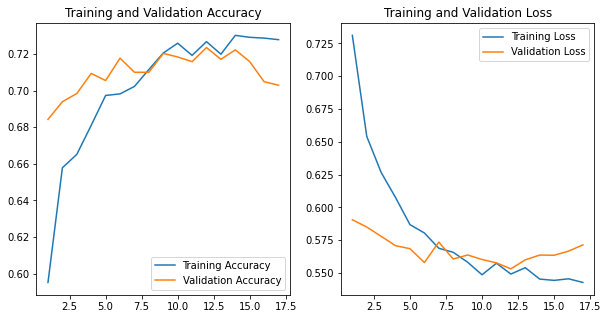

In [ ]:
# 매 epochs마다 모델 정확도와 손실을 그래프로 그리기
import matplotlib.pyplot as plt

acc = history.history['accuracy']         # 모델의 학습 정확도를 변수 acc에 기록  
val_acc = history.history['val_accuracy'] # 모델의 검증 정확도를 변수 val_acc에 기록

loss=history.history['loss']              # 모델의 학습 손실을 변수 loss에 기록  
val_loss=history.history['val_loss']      # 모델의 검증 손실을 변수 val_loss에 기록    

# epochs가 17회가 아닌 다른 결과(예:15회)로 나오면 아래 줄 17을 해당 숫자인 15로 바꿔주야 함에 유의
epochs_range = range(1, 17+1)             # epochs가 17회까지만 수행된 것을 반영

# 학습 정확도와 검증 정확도를 그립니다.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 학습 손실와 검증 손실을 그립니다.
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# model.fit() 실행시 검증 정확도가 가장 높은 에포크에 해당하는 모델 가중치 계수들 불러오기
model.load_weights('Ch9-NN2.tf')

In [ ]:
# 비교안 4) 활성화 함수 tanh, 옵티마이저 adam 모델 테스트 셋 accuracy
# 결과창의 195로 X_test 행수 6208를 나누면 약 32가 나옴. 즉 기본 배치값 32가 적용됐음을 알 수 있음

loss, accuracy = model.evaluate(X_test2, y_test)
print("Accuracy", accuracy)

195/195 [==============================] - 0s 2ms/step - loss: 0.5518 - accuracy: 0.7296
Accuracy 0.7295860648155212


In [ ]:
# 참고 코딩
X_new = X_test2[:10]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.4 ],
       [0.36],
       [0.71],
       [0.3 ],
       [0.58],
       [0.09],
       [0.72],
       [0.75],
       [0.5 ],
       [0.42]], dtype=float32)

In [ ]:
# 참고 코딩
y_new = y_test[:10]
y_new

10637    0
2333     1
8557     0
4081     0
1421     1
5100     0
8456     1
1602     1
8799     1
11294    0
Name: EBizSystem2, dtype: int64

In [ ]:
# 참고 코딩
X_new = X_test2[-10:]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.91],
       [0.51],
       [0.92],
       [0.78],
       [0.33],
       [0.79],
       [0.84],
       [0.72],
       [0.59],
       [0.36]], dtype=float32)

In [ ]:
# 참고 코딩
y_new = y_test[-10:]
y_new

8380     1
7034     0
220      1
11404    1
7292     1
9729     0
10328    1
7847     0
7250     1
10006    0
Name: EBizSystem2, dtype: int64

In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict(X_test2)
ROC_AUC = roc_auc_score(y_test, y_prob)
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.78577
